We start by importing the necessary library and creating our dataset. The dataset consists of features `X` and labels `y`, where `X` represents two-dimensional data points and `y` represents the class labels (0 or 1) for each data point.


In [11]:
import numpy as np

X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

Next, we import the LogisticRegression model from scikit-learn and fit it to our dataset. The `fit` method trains the model on the data, allowing it to learn the relationship between the features `X` and the labels `y`.

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

After fitting the model, we can make predictions on our dataset. The `predict` function classifies each input data point into one of the two classes (0 or 1), based on the learned relationship.


In [13]:
y_pred = lr_model.predict(X)
print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


To evaluate the performance of our model, we calculate its accuracy on the training set using the `score` method. This function returns the mean accuracy on the given test data and labels.


In [14]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


Improving the model involves scaling the features. Feature scaling can enhance model performance, especially for algorithms that are sensitive to the scale of the data like logistic regression. Here, we scale our features to have mean 0 and variance 1.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# It's good practice to fit the model again with scaled data
lr_model.fit(X_scaled, y)


LogisticRegression()

We can further assess our model by looking at a more detailed performance analysis, which includes precision, recall, f1-score, and support. The `classification_report` function provides these metrics, and the `confusion_matrix` offers insights into the true vs. predicted classifications.


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting with the scaled features
y_pred_scaled = lr_model.predict(X_scaled)

print(classification_report(y, y_pred_scaled))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_scaled))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix:
 [[3 0]
 [0 3]]


Finally, visualizing the decision boundary of our logistic regression model can provide intuitive insights into how the model is classifying the data points. The following code plots the decision boundary along with our data points.


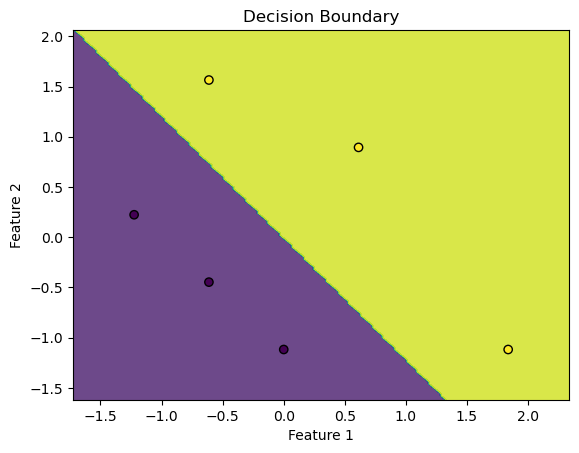

In [17]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plot_decision_boundary(X_scaled, y, lr_model)
plt.show()
